In [ ]:
!pip install astroquery

In [ ]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import random

In [ ]:
Vizier.ROW_LIMIT = -1
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"
Gaia.ROW_LIMIT = -1

# Pleiades - members
pleiadesCore = Vizier.get_catalogs('J/A+A/613/A63/tableb1')['J/A+A/613/A63/tableb1']

In [ ]:
pleiadesMembers = {}
pleiadesMembers['RA'] = []
pleiadesMembers['DEC'] = []
pleiadesMembers['pmra'] = []
pleiadesMembers['pmdec'] = []
pleiadesMembers['plx'] = []
pleiadesMembers['gmagFlux'] = []
pleiadesMembers['gmagFluxErr'] = []
pleiadesMembers['gmagNobs'] = []
pleiadesMembers['expectedPoissonErr'] = []
pleiadesMembers['expectedPoisNobsErr'] = []

for n in range(len(pleiadesCore)):
  coord = SkyCoord(pleiadesCore['RAJ2000'][n], pleiadesCore['DEJ2000'][n], unit=(u.degree, u.degree))
  r = Gaia.query_object_async(coordinate=coord, radius=3*u.arcsec)
  
  try:
    loc = np.where(r['dist'] == min(r['dist']))[0][0]
  except:
    continue

  gmagFlux = r['phot_g_mean_flux'][loc]
  gmagFluxErr = r['phot_g_mean_flux_error'][loc]
  gmagNobs = r['phot_g_n_obs'][loc]
  gExpStr = np.sqrt(gmagFlux)
  gExpLoo = np.sqrt(gmagFlux) / np.sqrt(gmagNobs)

  pleiadesMembers['RA'].append(r['ra'][loc])
  pleiadesMembers['DEC'].append(r['dec'][loc])
  pleiadesMembers['pmra'].append(r['pmra'][loc])
  pleiadesMembers['pmdec'].append(r['pmdec'][loc])
  pleiadesMembers['plx'].append(r['parallax'][loc])
  pleiadesMembers['gmagFlux'].append(r['phot_g_mean_flux'][loc])
  pleiadesMembers['gmagFluxErr'].append(r['phot_g_mean_flux_error'][loc])
  pleiadesMembers['gmagNobs'].append(r['phot_g_n_obs'][loc])
  pleiadesMembers['expectedPoissonErr'].append(np.sqrt(r['phot_g_mean_flux'][loc]))
  pleiadesMembers['expectedPoisNobsErr'].append(np.sqrt(r['phot_g_mean_flux'][loc]) / np.sqrt(r['phot_g_n_obs'][loc]))
 

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
pleiadesMembers['Membership'] = [True] * len(pleiadesMembers['RA'])

In [ ]:

pleiadesMems = pd.DataFrame(pleiadesMembers)
pleiadesMems.to_pickle('pleiadesMembers.pkl')

In [ ]:
min(pleiadesMembers['RA']), max(pleiadesMembers['RA']), min(pleiadesMembers['DEC']), max(pleiadesMembers['DEC'])

(53.30800661762213, 60.22139295579961, 19.184814108566584, 25.495030595613127)

In [ ]:
job = Gaia.launch_job_async("select ra, dec, pmra, pmdec, parallax, phot_g_mean_flux, phot_g_mean_flux_error, phot_g_n_obs"
"                            from gaiaedr3.gaia_source "
"                            WHERE ra > 52 and ra < 61 and dec > 18 and dec < 26 ")

j = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
len(j)

522371

In [ ]:
# grab 20000 random field stars
randomEntriesIdx = []
for i in range(20000):
  tryAgain = True
  while tryAgain:
    rN = random.randint(0,len(j))
    if rN not in randomEntriesIdx:
      randomEntriesIdx.append(rN)
      tryAgain = False

# make sure no repeats of members
goodIdx = []
for n in randomEntriesIdx:
  if round(j['ra'][n], 6) not in pleiadesCore['RAJ2000'] and (type(j['pmra'][n]) != np.ma.core.MaskedConstant):
    goodIdx.append(n)


pleiadesNonMembers = {}
pleiadesNonMembers['RA'] = []
pleiadesNonMembers['DEC'] = []
pleiadesNonMembers['pmra'] = []
pleiadesNonMembers['pmdec'] = []
pleiadesNonMembers['plx'] = []
pleiadesNonMembers['gmagFlux'] = []
pleiadesNonMembers['gmagFluxErr'] = []
pleiadesNonMembers['gmagNobs'] = []
pleiadesNonMembers['expectedPoissonErr'] = []
pleiadesNonMembers['expectedPoisNobsErr'] = []

for n in goodIdx:
  pleiadesNonMembers['RA'].append(j['ra'][n])
  pleiadesNonMembers['DEC'].append(j['dec'][n])
  pleiadesNonMembers['pmra'].append(j['pmra'][n])
  pleiadesNonMembers['pmdec'].append(j['pmdec'][n])
  pleiadesNonMembers['plx'].append(j['parallax'][n])
  pleiadesNonMembers['gmagFlux'].append(j['phot_g_mean_flux'][n])
  pleiadesNonMembers['gmagFluxErr'].append(j['phot_g_mean_flux_error'][n])
  pleiadesNonMembers['gmagNobs'].append(j['phot_g_n_obs'][n])
  pleiadesNonMembers['expectedPoissonErr'].append(np.sqrt(j['phot_g_mean_flux'][n]))
  pleiadesNonMembers['expectedPoisNobsErr'].append(np.sqrt(j['phot_g_mean_flux'][n]) / np.sqrt(j['phot_g_n_obs'][n]))
  
  
pleiadesNonMembers['Membership'] = [False] * len(pleiadesNonMembers['RA'])

In [ ]:
# pleiadesNonMemsTrunc = pd.DataFrame(pleiadesNonMembers)
# pleiadesNonMemsTrunc.to_pickle('pleiadesNonMembersTrunc.pkl')

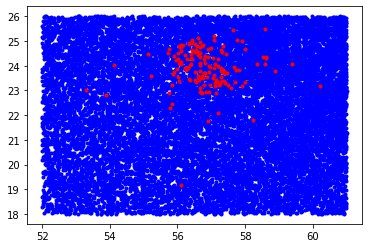

In [ ]:
plt.plot(pleiadesNonMemsTrunc['RA'], pleiadesNonMemsTrunc['DEC'], 'b.')
plt.plot(pleiadesMems['RA'], pleiadesMems['DEC'], 'r.')

In [ ]:
bigPleiadesTrunc = pd.concat([pleiadesMems, pleiadesNonMemsTrunc])
bigPleiades = pd.concat([pleiadesMems, pleiadesNonMems])

In [ ]:
# bigPleiadesTrunc.to_pickle('pleiadesSetCropped.pkl')
# bigPleiades.to_pickle('pleiadesSet.pkl')